<a href="https://colab.research.google.com/github/grievous-mischievous7/NNDL_LAB/blob/main/Spring_22_NNDL_Lab_1_190020028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1 : Realisation of Logic Gates and Linear Regression Equation

Name : **Neville Thomas Sebastian**

Roll Number : **190020028**

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana




#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



##OBJECTIVE:
**Implementing NAND , NOR and XOR gates using McCulloch Pit's model and Rosenblatt's Perceptron Model.**

##HYPOTHESIS:


1.   **In McCulloch Pit's Model, the predetermined weights should provide the corresponding outputs for the corresponding gates.**
2.   **In the Rosenblatt's perceptron Model, the perceptron should be able to find the weights using the perceptron learning law.**


##EXPERIMENTAL DESCRIPTION



1.   For the MP model , initially we assign predetermined weights and bias and write a code to verify that the weights we provided indeed results in the corresponding gate.
2.   For the Rosenblatt's perceptron model , we initialise soome random weights and update the weight each time in a iteration based on the error , the weight update is (error* learning rate * input) . 



## Programming : 
  Please write a program to demonstrate the same

In [6]:
## Part A : MP model

import numpy as np
import matplotlib.pyplot as plt
import random

##Output function ====> if x>0 then f(x) takes value 1 else f(x) takes value 0
def output_func(x):
  f_x=0  
  if(x>0):
    f_x=1
  return f_x
   
def mp_model(x,gate):

  ## Write the activation function and define weights and bias for all three gates
  input=[x[0],x[1]] #Making the tuple into a list.

  #=============================================================================
  def act_func(weights,bias,inputs):
    product=np.multiply(weights,inputs) 
    sum=0
    for s in product:
      sum += s
    x_act_func = sum - bias # weighted sum - bias
    return x_act_func
  #=============================================================================
  
  if gate == "NAND":
    ## Write your code here
    # X1' + X2'
    weights_layer1=[-1,-1] #includes weights of the first layer of neurons of the model
    weights_layer2=[1,1]   #includes weights of the second layer of neurons of the model
    bias=[-1,-1,0]      #bias of the model
    output1=[]
    output1.append(output_func(act_func(weights_layer1[:1],bias[0],input[0]))) #output from the first neuron in the first layer
    output1.append(output_func(act_func(weights_layer1[1:2],bias[1],input[1])))#output from the second neuron in the first layer 
    output2=act_func(weights_layer2,bias[2],output1) # output from the neuron in the last layer
    return (output_func(output2))                 

  if gate == "NOR":

    ## Write your code here
    #X1'X2'
    weights_layer1=[1,1] #includes weights of the first layer of neurons of the model
    weights_layer2=[-1]  #includes weights of the second layer of neurons of the model
    bias=[0,-1]
    output1=[]
    output1.append(output_func(act_func(weights_layer1,bias[0],input)))
    output2=act_func(weights_layer2,bias[1],output1)

    return (output_func(output2))

  if gate == "XOR":

    ## Write your code here
    # X1'X2+ X1X2'
    weights_layer1=[-1,1,1,-1] #includes weights of the first layer of neurons of the model
    weights_layer2=[1,1]       #includes weights of the second layer of neurons of the model
    bias=[0,0,0]
    output1=[]
    output1.append(output_func(act_func(weights_layer1[0:2],bias[0],input)))
    output1.append(output_func(act_func(weights_layer1[2:4],bias[1],input)))
    output2=act_func(weights_layer2,bias[2],output1)

    return (output_func(output2))
  
  #=============================================================================  


inp_list =[(0,0),(0,1),(1,0),(1,1)] ##list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates =['NAND','NOR','XOR']     ##list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    outp = mp_model(inp,gate)
    print("Logic Gate output is : ",outp)
  
  print('=====================================')

Results for NAND gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0
Results for NOR gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  0
Input is : (1, 0)
Logic Gate output is :  0
Input is : (1, 1)
Logic Gate output is :  0
Results for XOR gate : 
Input is : (0, 0)
Logic Gate output is :  0
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0


final weights of NAND gate :[-1.0, -0.5, 1.5]
Final error :0


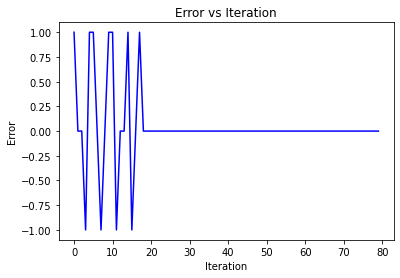

final weights of NOR gate :[-0.5, -0.5, 0.5]
Final error :0


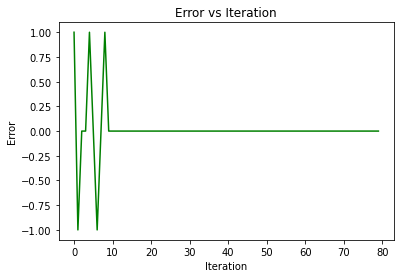

final weights of XOR gate :[-0.5, 0.0, 0.5]
Final error :-1


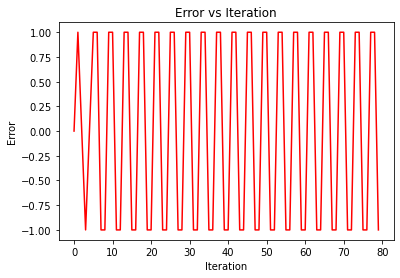

In [7]:
## Part B : Rosenblatt's Percept

import numpy as np
import matplotlib.pyplot as plt

def rosenblatt_perceptron(inp_list,output,learning_rate,w_initial,num_epochs,gate):

  err= []

  weights=w_initial #assigning weights inital weight values.
  #=============================================================================
  def predict(weights,inputs):
    p=np.multiply(weights,inputs) 
    x=0
    for s in p:
      x+= s
    if (x>0):
      return 1
    else:
      return 0
  #=============================================================================

  for epoch in range(num_epochs):
    
    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates
    for sample,target in zip(inp_list,output):
      prediction=predict(weights,sample)
      #print(prediction)
      error=(target-prediction) #error
      #print(error)
      err.append(error) #appending error in a list for plotting error vs iteration 
      weight_update=learning_rate*error
      weights[2]+=weight_update
      for i in range(2):
        weights[i]+=weight_update*sample[i]
      
  w_new=weights
  error=err
  return w_new,error

#===============================================================================

inp_list = [[0,0],[0,1],[1,0],[1,1]]## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
learning_rate = .5 ## Define a learning rate
num_epochs = 20 ## Set number of epochs
##==============================================================================
bias=1
for i in inp_list:
  i.append(bias) #appending bias with the original data so as to give it as a input.
#print(inp_list)
##==============================================================================

## For NAND gate

nand_output =[1,1,1,0]  ## Define NAND gate target output
w_initial =[0,0,0]## Initialise weights
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
print("final weights of NAND gate :" + str(w_new))
print("Final error :"+str(error[-1]))
plt.plot(list(range(len(error))),error,color='b')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Error vs Iteration')
plt.show()
print('=================================================')
## For NOR gate

nor_output  =[1,0,0,0]  ## Define NOR gate target output
w_initial =[0,0,0]## Initialise weights
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
print("final weights of NOR gate :" + str(w_new))
print("Final error :"+str(error[-1]))
plt.plot(list(range(len(error))),error,color='g')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Error vs Iteration')
plt.show()

print('=================================================')
## For XOR gate
xor_output  =[0,1,1,0]  ## Define XOR gate target output
w_initial =[0,0,0]## Initialise weights
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
print("final weights of XOR gate :" + str(w_new))
print("Final error :"+str(error[-1]))
plt.plot(list(range(len(error))),error,color='r')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Error vs Iteration')
plt.show()
print('=================================================')

## Inferences and Conclusion : State all the key observations and conclusion

##INFERENCE:


1.   For the MP model : 

*   for NAND gate : there was two MP neurons in the first layer(each with 1 input) and 1 neuron in the second layer(2 inputs) and the predetermined weights provide the desired output for the NAND gate.
*   for NOR gate : there was 1 MP neuron (with 2 inputs) in the first layer and 1 neuron in the second layer and the predetermined weights provide the desired ouptut for the nOR gate
*   for XOR gate: there was 2 MP neuron in the first layer(each with 2 inputs) and 1 neuron in the second layer and the predetermined weights provide the desired output for the XOR gate.

2.   For the Rosenblatt's perceptron model:


*   For NAND and NOR gate the 3 input single layered neuron model is able to learn the weights and provide the corresponding results.But for the XOR gate the 3 input single layered neuron model does not provide the corresponding output.  

##CONCLUSION:


1.   **For the MP model we have obtained the desired result for all 3 gates.**
2.   **For the Rosenblatt's model we obtained desired result for NAND and NOR , but not for XOR.**






# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Write down the Objectives, Hypothesis and Experimental description for the above problem

##OBJECTIVE:
**Implementing y=1+2x1+2x2 using Widrow's Adaline model.**

##HYPOTHESIS:


1.   **The model should be able to find the weights using the learning law.**



##EXPERIMENTAL DESCRIPTION


1.   Initially the data points are generated and then corresponding target value is found . This is passed on as an argument.
2.   The output function of a neuron in widrow adaline's model is the activation function itself.The weight update is : (Error* learning rate *input).




## Programming : 
  Please write a program to demonstrate the same

final weights : [2.000000000000049, 2.0000000000000444, 0.9999999999941498]


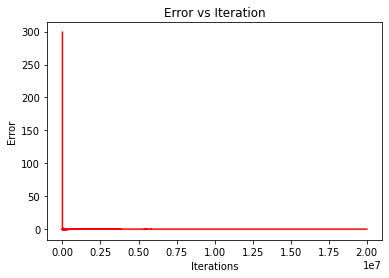

For randomely generated X1 and X2 : [17, 68]
predicted value = 170.999999999998
Target value 171


In [11]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations

def widrow_adaline(inp,learning_rate,w_initial,num_epochs,N):

  error = [] # the error list to be returned 
  err=None   #the error for eachiteration
  x1=inp[0]  
  x2=inp[1]
  targets=inp[2]
  samples=list(zip(x1,x2))#making a pair of x1 and x2
  weights=w_initial

  for epoch in range(num_epochs):

    ## Write the learning(training) loop here and return the new weights, also save the error after each iteration
    for sample,target in zip(samples,targets):
      prediction= weights[0]*sample[0] + weights[1]*sample[1] + weights[2]
      #output is activation function itself
      err = target - prediction
      error.append(err)
      weight_update=learning_rate*err
      weights[2]+=weight_update
      weights[0]+=weight_update*sample[0]
      weights[1]+=weight_update*sample[1]
      
  w_new=weights#assigning final weights

  return w_new,error  


N = 1000## Set the number of input points 
learning_rate = 0.00001## Define a learning rate
w_initial =[0,0,0] ## Initialise weights
num_epochs = 20000 ## Set number of epochs

## Generate the input below 
x1=random.choices(range(100),k=N)#generating x1
x2=random.choices(range(100),k=N)#generating x2
y=[]
for i in range(len(x1)):
  y.append(1+2*x1[i]+2*x2[i])#generating target y
inp=[]
inp.append(x1)
inp.append(x2)
inp.append(y)## An input array of the shape (3,100)


w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
print('final weights :',w_new)
plt.plot(list(range(len(error))),error,color='r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()
X=random.choices(range(100),k=2)
Y=np.dot(w_new[:2],X)+w_new[2]
print('For randomely generated X1 and X2 :',X)
print('predicted value =',Y)
print('Target value',1+2*X[0]+2*X[1])

## Inferences and Conclusion : State all the key observations and conclusion

##INFERENCE:


1.   The model is able to generate weight values close to the original weight values.The error is almost zero.
2.   As the learning rate is increased and making N (range of a sample and no.of samples)  and number of epochs constant the error rate shoots up after a certain no.of iterations.
3.  The learning rate is kept very low.In case 

4.  If the range of values is large and the no.of epochs is also large then the bias term will come close to the desired value.
##CONCLUSION:

**The WIDROW ADALINE's MODEL is almost able to generate the correct predicted output.**

